In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import scipy 
import statsmodels.api as sm


# Clase 2:
## Task 1: 

### P1: 
Simular observaciones de una Rayleigh con parametro 0.5 y repetirlo para n=40, 400, 4000. Para cada tamaño muestral.
### P2: 
Para cada tamaño muestral n, remuestrear el estadístico $\sqrt(n)(\bar{Y}_n-\mu)$ y plotear su histograma.


               0
count  40.000000
mean    0.601361
std     0.309615
min     0.134929
25%     0.333031
50%     0.606470
75%     0.829962
max     1.393166
                0
count  400.000000
mean     0.638783
std      0.325813
min      0.025540
25%      0.393908
50%      0.608936
75%      0.851096
max      1.679934
                 0
count  4000.000000
mean      0.624314
std       0.325336
min       0.009362
25%       0.384436
50%       0.588283
75%       0.829889
max       2.202204


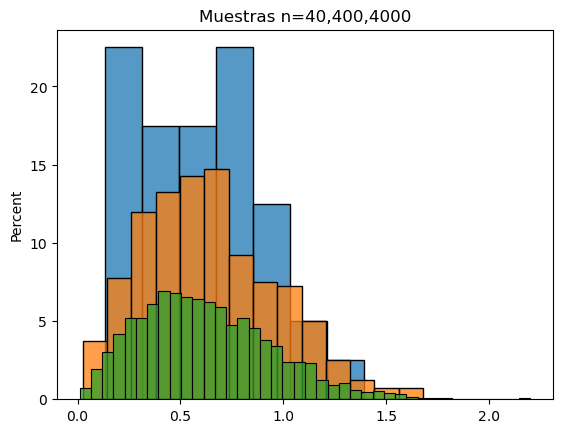

In [13]:

#task 1
#p1
scale=0.5
for i in [40, 400, 4000]:
    sim=np.random.rayleigh(scale,i)
    sns.histplot(sim,stat="percent").set_title(f"Muestras n=40,400,4000")
    sim_pd=pd.DataFrame(sim)
    print(sim_pd.describe())

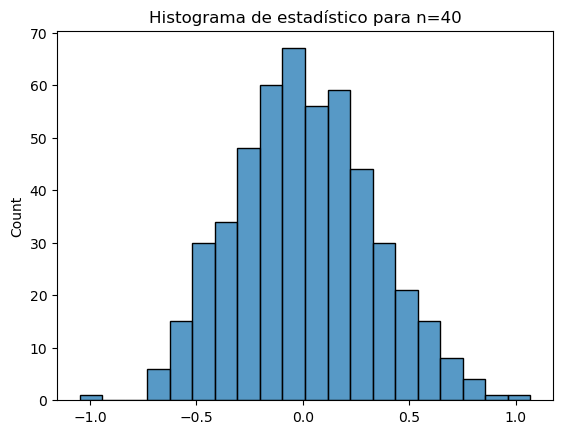

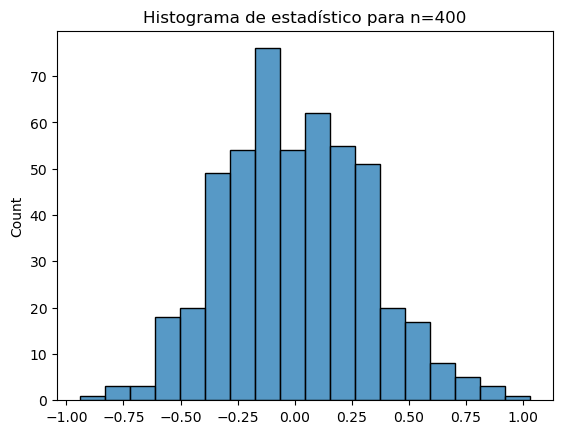

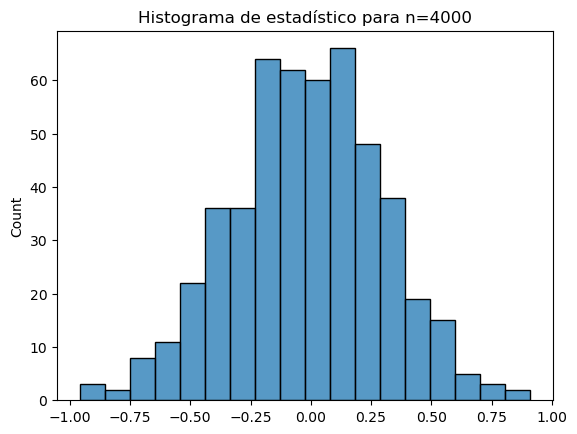

In [22]:
#p2: 
for i in [40,400,4000]:
    mean=scale*np.sqrt(np.pi/2)#Media de una distribución rayleigh
    estadisticos=np.array([])
    for j in range(500):
        sim=np.random.rayleigh(scale,i)
        y_prom=np.mean(sim)
        estadisticos=np.append(estadisticos,np.sqrt(len(sim))*(y_prom-mean))
    sns.histplot(estadisticos).set_title(f"Histograma de estadístico para n={i}")
    plt.show()

## Task 2:
### P1
Simular 40 observaciones para $N(0,\mu)$ con $\mu=0.5,1,1.8,2,5$ plotear histograma y estadísticos descriptivos. 

### P2:
Simular 2000 veces, calcular media y obtener estadístico t para hipótesis nula $H_0:\mu=0$, vs $H_1:\mu\neq 0$. ¿Qué tan frecuentemente se rechaza $H_0$?

### P3:
Repetir para T=100, 400, 2000, 4000. 

Descriptivos para media mu=0.5                0
count  40.000000
mean    0.818756
std     1.154244
min    -1.147754
25%    -0.154501
50%     0.849674
75%     1.663849
max     2.934565
Descriptivos para media mu=1                0
count  40.000000
mean    0.919145
std     0.968977
min    -0.866717
25%     0.349794
50%     0.771796
75%     1.754285
max     2.631266
Descriptivos para media mu=2                0
count  40.000000
mean    1.996157
std     0.927511
min    -0.359283
25%     1.378448
50%     1.810783
75%     2.485771
max     4.350900
Descriptivos para media mu=5                0
count  40.000000
mean    5.133011
std     1.152445
min     2.758270
25%     4.299891
50%     5.146091
75%     5.915960
max     7.104874


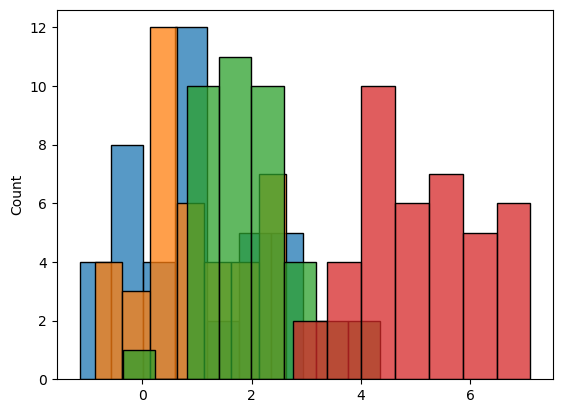

In [30]:
#task 2:
#p1

for mu in [0.5, 1,2,5]:
    sim=np.random.normal(loc=mu,scale=1,size=40)
    sns.histplot(sim)
    sim_pd=pd.DataFrame(sim)
    print(f"Descriptivos para media mu={mu}",sim_pd.describe())

0.592
0.925
0.9845
1.0


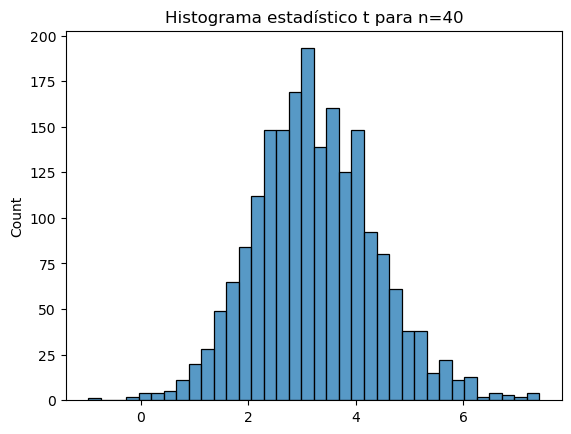

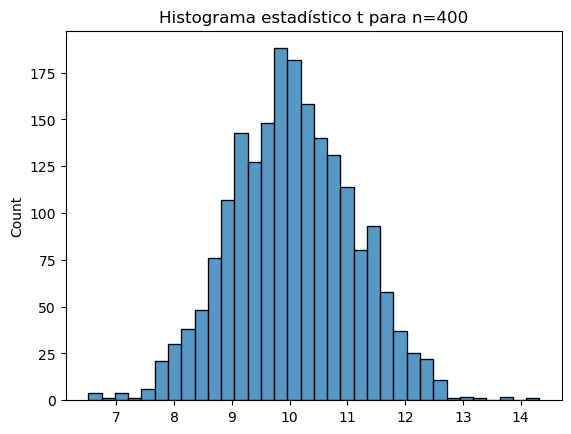

In [16]:
#p2
for mu in [0.3,0.5,0.6,1]:
    sim=np.random.normal(loc=mu,scale=1,size=(2000,40)) #Cada fila una simulación
    means=np.mean(sim,1)
    deviations=np.std(sim,1)
    t_statistic_vector=np.sqrt(40)*means/deviations
    t_p_values=scipy.stats.t.sf(t_statistic_vector,39)
    test_vector=t_p_values<5e-2
    print(np.sum(test_vector)/2000)
    if mu==0.5:
        sns.histplot(t_statistic_vector).set_title("Histograma estadístico t para n=40")
plt.show()

mu,sigma=0.5,3
for n in [100,400,2000,4000]:
    sim=np.random.normal(loc=mu,scale=1,size=(2000,n))
    means=np.mean(sim,1)
    deviations=np.std(sim,1)
    t_statstic_vector=np.sqrt(n)*means/deviations
    if n==400:
        sns.histplot(t_statstic_vector).set_title(f"Histograma estadístico t para n=400")
        pass
plt.show()

# Task 3

### P1


# Semana 5

### Tarea A:
Simule 50 datos de un proceso de raíz unitaria. Realice la regresión de $\Delta y_t$ con respescto a $y_{t-1}$ y obtenga el estadístico-t. Realice el proceso 2000 veces y construya el histograma del estadístico.

In [ ]:
t_values = np.zeros(2000)
for j in range(2000):

  yt = np.zeros(50)
  rho = 1
  for i in range(1,len(yt)):
    yt[i] = rho *  yt[i-1] +  np.random.normal(0,1)

  delta = np.diff(yt)
  yt_1 = yt[0:len(yt)-1]
  #plt.plot(yt_1)
  yt_1 = sm.add_constant(yt_1)
  model = sm.OLS(delta, yt_1).fit()
  t_values[j] = model.tvalues[1] ##########Obtención de estadístico y regresión a mano para comprobar!!!

plt.hist(t_values)
plt.title('Histograma del T-estadístico')



### Tarea B
Simule 50 datos con ρ = 1, 0.9, 0.8 y 0.7. Realice la regresión de ∆yt sobre yt−1 y obtenga el estadístico-t. Realice el proceso 2000 veces. Use el valor crítico del estadístico al 5% y calcule el porcentaje de rechazos.

In [ ]:
rho = 1
t_values = np.zeros(2000)
for j in range(2000):

  yt = np.zeros(50)

  for i in range(1,len(y)):
    yt[i] = (rho-1) *  yt[i-1] +  np.random.normal(0,1)

  delta = np.diff(yt)
  yt_1 = yt[0:len(yt)-1]
  #plt.plot(yt_1)
  yt_1 = sm.add_constant(yt_1)
  model = sm.OLS(delta, yt_1).fit()
  t_values[j] = model.tvalues[1]

plt.hist(t_values)
plt.title('Histograma del T-estadístico')

perc = np.percentile(t_values,5)

porcentajes_rechazos = np.count_nonzero(t_values < perc )/2000
print(porcentajes_rechazos)

In [ ]:
#Ya uso perc como valor crítico empírico para el resto de distribuciones con rho cambiado
rho = 0.9
t_values = np.zeros(2000)
for j in range(2000):

  yt = np.zeros(50)

  for i in range(1,len(y)):
    yt[i] = (rho-1) *  yt[i-1] +  np.random.normal(0,1)

  delta = np.diff(yt)
  yt_1 = yt[0:len(yt)-1]
  #plt.plot(yt_1)
  yt_1 = sm.add_constant(yt_1)
  model = sm.OLS(delta, yt_1).fit()
  t_values[j] = model.tvalues[1]

plt.hist(t_values)
plt.title('Histograma del T-estadístico')

porcentajes_rechazos = np.count_nonzero(t_values < perc )/2000

print(porcentajes_rechazos)

In [ ]:
rho = 0.8
t_values = np.zeros(2000)
for j in range(2000):

  yt = np.zeros(50)

  for i in range(1,len(y)):
    yt[i] = (rho-1) *  yt[i-1] +  np.random.normal(0,1)

  delta = np.diff(yt)
  yt_1 = yt[0:len(yt)-1]
  #plt.plot(yt_1)
  yt_1 = sm.add_constant(yt_1)
  model = sm.OLS(delta, yt_1).fit()
  t_values[j] = model.tvalues[1]

plt.hist(t_values)
plt.title('Histograma del T-estadístico')

porcentajes_rechazos = np.count_nonzero(t_values < perc )/2000
print(porcentajes_rechazos)

In [ ]:
rho = 0.7
t_values = np.zeros(2000)
for j in range(2000):

  yt = np.zeros(50)

  for i in range(1,len(y)):
    yt[i] = (rho-1) *  yt[i-1] +  np.random.normal(0,1)

  delta = np.diff(yt)
  yt_1 = yt[0:len(yt)-1]
  #plt.plot(yt_1)
  yt_1 = sm.add_constant(yt_1)
  model = sm.OLS(delta, yt_1).fit()
  t_values[j] = model.tvalues[1]

plt.hist(t_values)
plt.title('Histograma del T-estadístico')

porcentajes_rechazos = np.count_nonzero(t_values < perc )/2000
print(porcentajes_rechazos)

Podemos ver que a medida que el valor de rho se aleja de 1, la prueba rechaza muchos más casos. Es decir, esta prueba nos sirve como una noción naive de cuando rho es diferente de 1.

# Semana 8 (5 en interactiva)


# Semana 9


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm


df=pd.read_excel(r"C:\Users\marti\OneDrive\Documentos\personal\Universidad\Econometria\Series_de_tiempo\sem_9_sp500Dummies.xlsx", sheet_name="table")


In [83]:
df["log_ret"]=np.log(1+df["Open"].pct_change())
df.head()
df['Date'] = pd.to_datetime(df['Date'])
dummies = pd.get_dummies(df['Date'].dt.strftime('%A'), prefix='dia')
df = pd.concat([df, dummies], axis=1)
df.drop(0,inplace=True)
# Mostrar el DataFrame resultante
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Unnamed: 7,Unnamed: 8,Unnamed: 9,log_ret,dia_Friday,dia_Monday,dia_Thursday,dia_Tuesday,dia_Wednesday
1,1950-01-04,16.85,16.85,16.85,16.85,1890000,16.85,0.01134,4,1950-01-04,0.011340,0,0,0,0,1
2,1950-01-05,16.93,16.93,16.93,16.93,2550000,16.93,0.004737,5,1950-01-05,0.004737,0,0,1,0,0
3,1950-01-06,16.98,16.98,16.98,16.98,2010000,16.98,0.002949,6,1950-01-06,0.002949,1,0,0,0,0
4,1950-01-09,17.08,17.08,17.08,17.08,2520000,17.08,0.005872,2,1950-01-09,0.005872,0,1,0,0,0
5,1950-01-10,17.03,17.03,17.03,17.03,2160000,17.03,-0.002932,3,1950-01-10,-0.002932,0,0,0,1,0


array([ 4.92433686e-05, -3.55576374e-04,  5.22644308e-04,  6.92870198e-04,
        5.14305864e-04])

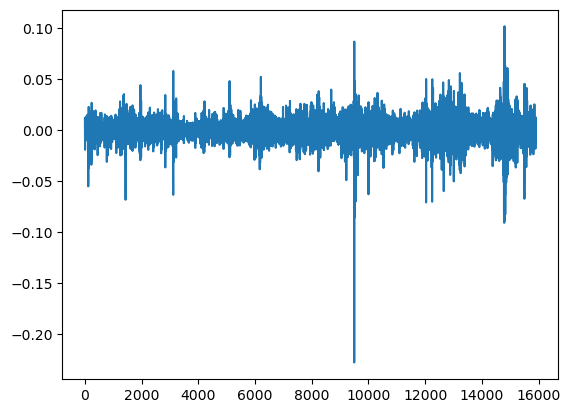

In [84]:
plt.plot(df["log_ret"])

log_ret=df["log_ret"].values
log_ret.shape=(log_ret.size,1)
matr_dummies=df[["dia_Monday","dia_Tuesday","dia_Wednesday","dia_Thursday","dia_Friday"]].values #Correspondencia entre retornos y dummy activa
matr_retornos_dia=log_ret*matr_dummies
prom=np.sum(matr_retornos_dia,axis=0)/np.sum(matr_dummies,axis=0)
prom

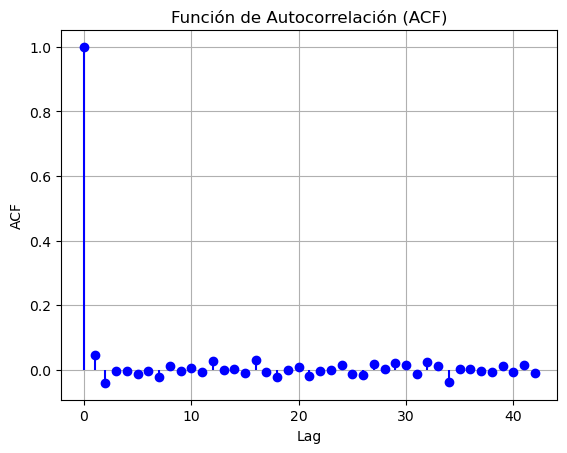

In [58]:
acf = sm.tsa.acf(df["log_ret"], fft=False)
# Trazar el ACFplt.figure(figsize=(10, 4))
plt.stem(acf, basefmt=" ", markerfmt="bo", linefmt="b-")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.title("Función de Autocorrelación (ACF)")
plt.grid(True)
plt.show()

In [85]:
# # Calcula el ACF
# acf, confint = sm.tsa.acf(df["log_ret"], fft=False, nlags=20, alpha=0.05)

 

# # Trazar el ACF y la banda de confianza
# lags = range(len(acf))
# plt.figure(figsize=(10, 4))
# plt.stem(lags, acf, basefmt=" ", markerfmt="bo", linefmt="b-")
# plt.xlabel("Lag")
# plt.ylabel("ACF")
# plt.title("Función de Autocorrelación (ACF) con Banda de Confianza (alpha=0.05)")
# plt.grid(True)

 

# # Trazar la banda de confianza
# plt.fill_between(lags, confint[:, 0], confint[:, 1], color='gray', alpha=0.5, label='Banda de Confianza (95%)')

 

# # Encontrar los rezagos que se salen de la banda de confianza
# outliers = [lag for lag, (lower, upper) in zip(lags, confint) if acf[lag] < lower or acf[lag] > upper]
# if outliers:
#     print(f"Rezagos que se salen de la banda de confianza: {outliers}")

 

# plt.legend()
# plt.show()

In [86]:

 

# Estimar un modelo AR(p) con variables dummy

df.drop(columns=["dia_Friday"],inplace=True)
p =2  # Puedes ajustar este valor según tu elección de orden AR(p)
X = df[['dia_Monday', 'dia_Tuesday', 'dia_Wednesday', 'dia_Thursday']]
X = sm.add_constant(X)  # Agregar una constante (intercepto) al modelo
y = df['log_ret']

 

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_ret   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.436
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           3.60e-05
Time:                        17:27:39   Log-Likelihood:                 51295.
No. Observations:               15901   AIC:                        -1.026e+05
Df Residuals:                   15896   BIC:                        -1.025e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.000      3.015

In [87]:
model = sm.tsa.AR(df["log_ret"], dates=df.index).fit(maxlag=p, method='mle', ic='aic') # Imprimir los coeficientes AR estimados

print("Coeficientes AR estimados:")

print(model.params)

NotImplementedError: AR has been removed from statsmodels and replaced with statsmodels.tsa.ar_model.AutoReg.